In [3]:
#Importar librerias necesarias
from funpymodeling.exploratory import freq_tbl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
mexico1=pd.read_csv("listings_Mexico.csv")
mexico1.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,...,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,NaN,"It borders the old and traditional San Rafael,...",https://a0.muscache.com/pictures/16663562/7bed...,4647293,...,4.93,4.46,4.75,NaN,t,1,1,0,0,1.19
4,67703,https://www.airbnb.com/rooms/67703,20240627045222,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.91,NaN,f,2,2,0,0,0.32


In [5]:
mexico= mexico1.drop(['neighbourhood_group_cleansed', 'calendar_updated', 'license', 'calculated_host_listings_count_shared_rooms'], axis=1)
mexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,...,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.70,4.87,4.78,4.98,4.48,f,13,4,2,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,NaN,"It borders the old and traditional San Rafael,...",https://a0.muscache.com/pictures/16663562/7bed...,4647293,...,4.72,4.84,4.93,4.46,4.75,t,1,1,0,1.19
4,67703,https://www.airbnb.com/rooms/67703,20240627045222,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.75,4.94,4.92,4.98,4.91,f,2,2,0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,https://www.airbnb.com/rooms/1187191423076770832,20240627045222,2024-06-28,city scrape,¡Crystal! - 7BR Fantastic! In heart of Roma,Located in the vibrant neighborhood of Roma Su...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,19255745,...,NaN,NaN,NaN,NaN,NaN,t,8,8,0,NaN
26532,1187248376951514656,https://www.airbnb.com/rooms/1187248376951514656,20240627045222,2024-06-28,city scrape,Iconic Suite | Terrace | View !,"Welcome to Icon Cibles, a newly built modern s...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,7681206,...,NaN,NaN,NaN,NaN,NaN,f,11,11,0,NaN
26533,1187269835146549014,https://www.airbnb.com/rooms/1187269835146549014,20240627045222,2024-06-28,city scrape,Acogedor y moderno depa en la Condesa,Enjoy the warmth and tranquility provided by t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,50951150,...,NaN,NaN,NaN,NaN,NaN,f,1,1,0,NaN
26534,1187283698786191137,https://www.airbnb.com/rooms/1187283698786191137,20240627045222,2024-06-28,city scrape,Estudio con amplia terraza,Private studio on the top floor of an old hous...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,147254250,...,NaN,NaN,NaN,NaN,NaN,f,3,3,0,NaN


In [6]:
#Ajustar maximo de columnas
pd.options.display.max_columns = None

In [7]:
mexico.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
instant_bookable                                 object
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
reviews_per_month                               float64
Length: 71, dtype: object

In [8]:
mexico.replace("NaN", np.nan, inplace=True)

In [9]:
#Sustituir valores nulos por un string en  concreto 
mexico["price"] =mexico["price"].replace('nan',0) 
mexico["host_response_rate"] =mexico["host_response_rate"].replace('nan',0) 
mexico["host_acceptance_rate"] =mexico["host_acceptance_rate"].replace('nan',0) 
mexico["reviews_per_month"] =mexico["reviews_per_month"].replace('NaN',0) 


In [10]:
#Reemplazamos el % en la columna price para que se vuelva numerica
mexico['price'] = mexico['price'].str.replace('$', '')
mexico['price'] = mexico['price'].str.replace(',', '', regex=False)
mexico['price'] = pd.to_numeric(mexico['price'])

In [11]:
#Reemplazamos el % en la columna price para que se vuelva numerica
mexico['reviews_per_month'] = mexico['reviews_per_month'].astype(str).str.replace('%', '').astype(float)
#Reemplazamos el % en la columna price para que se vuelva numerica
mexico['host_response_rate'] = mexico['host_response_rate'].astype(str).str.replace('%', '').astype(float)
mexico['host_acceptance_rate'] = mexico['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)

In [12]:
mexico.drop("amenities",axis=1)
mexico.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100.0,88.0,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0.0,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,1,7,1,1,7,7,1.0,7.0,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100.0,92.0,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,1,365,1,1,365,365,1.0,365.0,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,f,13,4,2,0.42


In [13]:
mexico.isnull().sum().sum()

114900

In [14]:
mexico["reviews_per_month"] =mexico["reviews_per_month"].replace('NaN',0) 

In [15]:
#Reemplazamos valores nulos del dataframe con "ffill"
mexicodata =mexico.fillna(method="ffill")
mexicodata =mexico.fillna(method="bfill")


C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\666244821.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexicodata =mexico.fillna(method="ffill")
C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\666244821.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexicodata =mexico.fillna(method="bfill")


In [16]:
mexicodata.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
instant_bookable                                 0
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
reviews_per_month                               54
Length: 71, dtype: int64

In [17]:
mexicodata["host_about"] =mexicodata["host_about"].fillna("No captured")
mexicodata["host_neighbourhood"] =mexicodata["host_neighbourhood"].fillna("No captured")
mexicodata["first_review"] =mexicodata["first_review"].fillna("No captured")
mexicodata["last_review"] =mexicodata["last_review"].fillna("No captured")

mexicodata["review_scores_rating"] =mexicodata["review_scores_rating"].fillna("0")
mexicodata["review_scores_accuracy"] =mexicodata["review_scores_accuracy"].fillna("0")
mexicodata["review_scores_cleanliness"] =mexicodata["review_scores_cleanliness"].fillna("0")
mexicodata["review_scores_checkin"] =mexicodata["review_scores_checkin"].fillna("0")
mexicodata["review_scores_communication"] =mexicodata["review_scores_communication"].fillna("0")
mexicodata["review_scores_location"] =mexicodata["review_scores_location"].fillna("0")
mexicodata["review_scores_value"] =mexicodata["review_scores_value"].fillna("0")
mexicodata["reviews_per_month"] =mexicodata["reviews_per_month"].fillna("0")

In [18]:
mexicodata.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
instant_bookable                                0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
reviews_per_month                               0
Length: 71, dtype: int64

In [19]:
#Realizamos una copia del dataframe
mexicoready=mexicodata.copy()

#Sustituir valores nulos con promedio o media
mexicodata["host_response_rate"]=mexicodata["host_response_rate"].fillna(round(mexicoready["host_response_rate"].mean(),1))
mexicodata["host_acceptance_rate"]=mexicodata["host_acceptance_rate"].fillna(round(mexicoready["host_acceptance_rate"].mean(),1))

In [20]:
mexicoready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26536 non-null  int64  
 1   listing_url                                   26536 non-null  object 
 2   scrape_id                                     26536 non-null  int64  
 3   last_scraped                                  26536 non-null  object 
 4   source                                        26536 non-null  object 
 5   name                                          26536 non-null  object 
 6   description                                   26536 non-null  object 
 7   neighborhood_overview                         26536 non-null  object 
 8   picture_url                                   26536 non-null  object 
 9   host_id                                       26536 non-null 

In [21]:
mexicoready["reviews_per_month"] =mexicoready["reviews_per_month"].replace('NaN',0).astype(float)

In [22]:
mexicoready.isnull().sum().sum()

0

In [23]:
mexicoready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26536 non-null  int64  
 1   listing_url                                   26536 non-null  object 
 2   scrape_id                                     26536 non-null  int64  
 3   last_scraped                                  26536 non-null  object 
 4   source                                        26536 non-null  object 
 5   name                                          26536 non-null  object 
 6   description                                   26536 non-null  object 
 7   neighborhood_overview                         26536 non-null  object 
 8   picture_url                                   26536 non-null  object 
 9   host_id                                       26536 non-null 

In [24]:
mexicoready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26536 non-null  int64  
 1   listing_url                                   26536 non-null  object 
 2   scrape_id                                     26536 non-null  int64  
 3   last_scraped                                  26536 non-null  object 
 4   source                                        26536 non-null  object 
 5   name                                          26536 non-null  object 
 6   description                                   26536 non-null  object 
 7   neighborhood_overview                         26536 non-null  object 
 8   picture_url                                   26536 non-null  object 
 9   host_id                                       26536 non-null 

In [25]:
variables=mexicoready.iloc[ : , [16,17,23,33,70,39]]
variables

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,100.0,88.0,6,2,0.41,1652.0
1,0.0,92.0,1,2,0.42,3663.0
2,100.0,92.0,17,14,0.42,18000.0
3,100.0,96.0,4,4,1.19,814.0
4,89.0,62.0,4,4,0.32,1923.0
...,...,...,...,...,...,...
26531,100.0,100.0,15,16,0.00,7850.0
26532,97.0,91.0,51,3,0.00,1478.0
26533,100.0,100.0,15,3,0.00,936.0
26534,100.0,100.0,3,4,0.00,768.0


c:\Users\Miroslava\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miroslava\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miroslava\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Miroslava\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:111

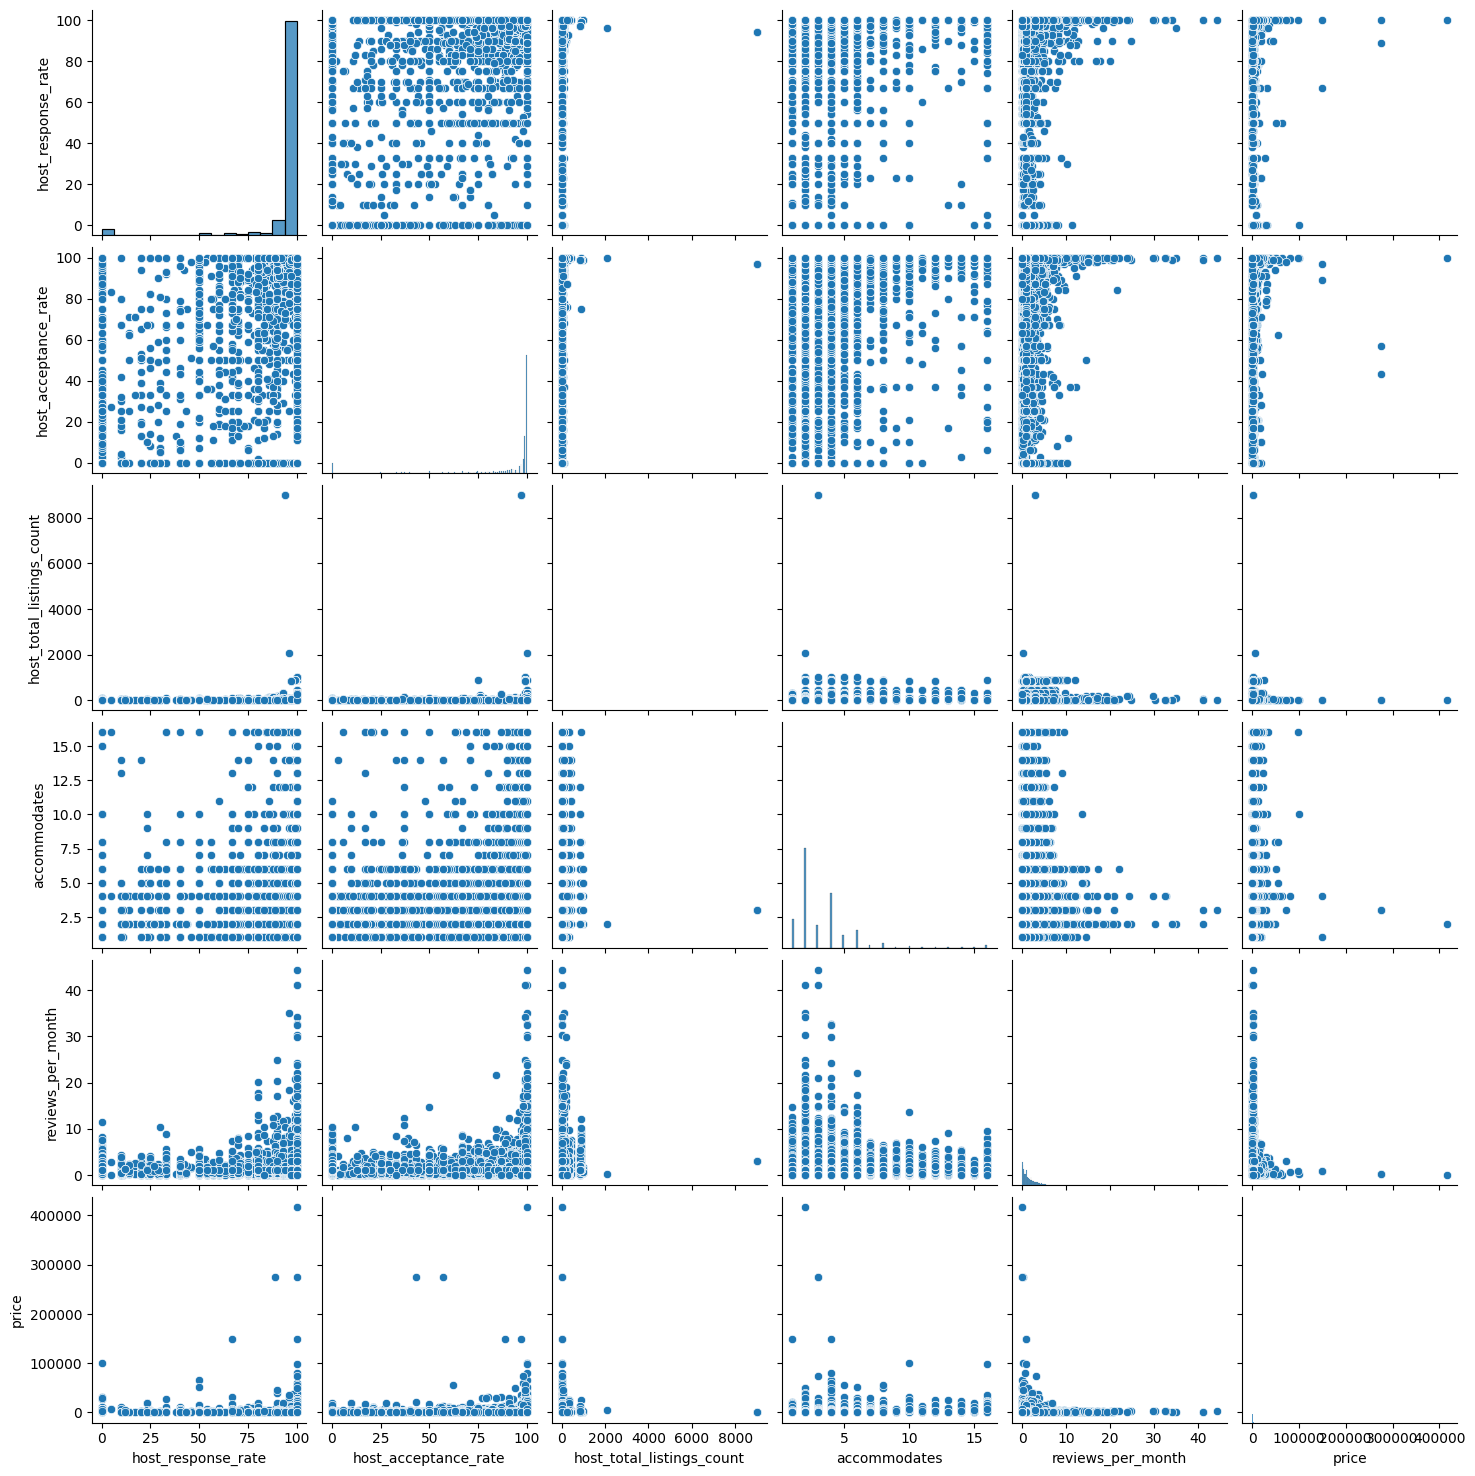

In [26]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(variables)

PRECIO (price)

In [27]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready[['price']]
Var_Dep= mexicoready['beds']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

función inversa 

In [28]:
def  func1 (x, a, b, c):
     return 1/a*x

In [29]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])

C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\1566077756.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])


In [30]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([5.20733783e+03, 1.00000000e+00, 1.00000000e+00])

In [31]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['beds'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x
yfit1

C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\1415635231.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['beds'])


,price
0,0.317245
1,0.703430
2,3.456661
3,0.156318
4,0.369287
...,...
26531,1.507488
26532,0.283830
26533,0.179746
26534,0.147484


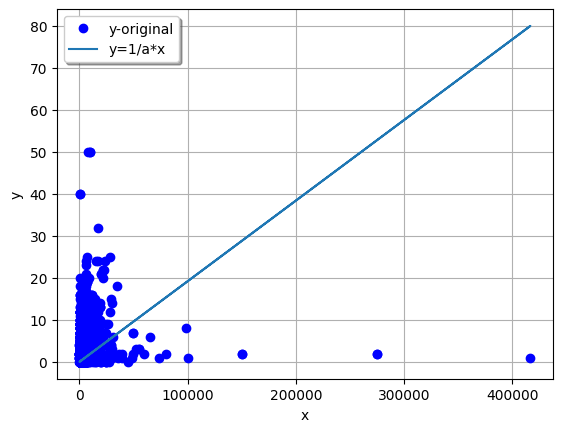

In [32]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [33]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.9024427627987959

no fue un modelo adecuado ya que la r2 salio 0 

funcion cuadratica inversa 

In [34]:
def  func1 (x, a, b, c):
     return 1/a*x**2

In [35]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])
parametros

C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\370714508.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])


array([2.94634029e+10, 1.00000000e+00, 1.00000000e+00])

In [36]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['beds'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2
yfit1

C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\642150733.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['beds'])


,price
0,0.000093
1,0.000455
2,0.010997
3,0.000022
4,0.000126
...,...
26531,0.002091
26532,0.000074
26533,0.000030
26534,0.000020


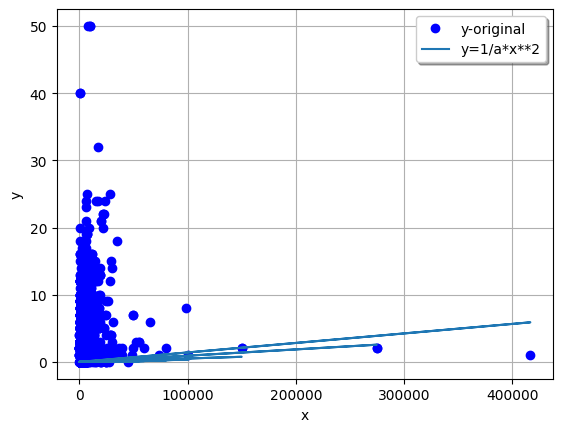

In [37]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [38]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-1.1590617671902357

al tener una r negativa el modelo no fue el adecuado

funcion cuadratica

In [39]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [40]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])
parametros

array([-6.83292569e-10,  2.35904134e-04,  1.56012448e+00])

In [41]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['beds'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,price
0,1.947973
1,2.415073
2,5.585012
3,1.751698
4,2.011241
...,...
26531,3.369866
26532,1.907298
26533,1.780332
26534,1.740896


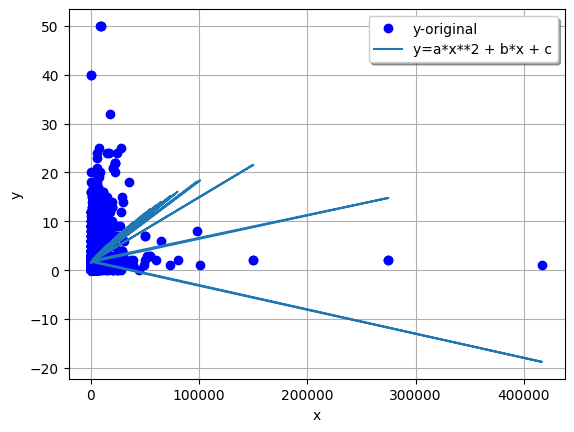

In [42]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [43]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.09862628031329168

iendo 0 el modelo no tiene ninguna capacidad predictiva y simplemente predice el promedio de los valores observados.

modelo 4 exponencial inversa 

In [44]:
def func2(x, a, b, c):
    return a /np.exp(b * x) + c

In [45]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['beds'])
parametros



array([-6.83292569e-10,  2.35904134e-04,  1.56012448e+00])

In [46]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['beds'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a /np.exp(b * x) + c
yfit1

c:\Users\Miroslava\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,price
0,566.62007
1,566.62007
2,566.62007
3,566.62007
4,566.62007
...,...
26531,566.62007
26532,566.62007
26533,566.62007
26534,566.62007


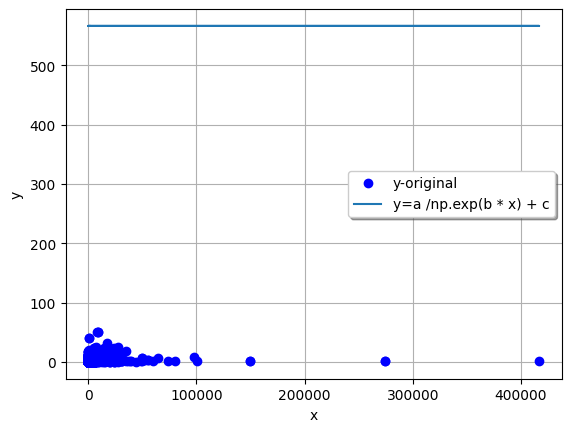

In [47]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a /np.exp(b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [48]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-102921.37139758587

al ser negativo el modelo no sirve para el analisis pero se utilizo la exponencial inversa ya que decrese la grafica 

acomodates 

str to float 

In [49]:
mexicoready['accommodates'] = pd.to_numeric(mexicoready['accommodates'], errors='coerce')

In [50]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready[['accommodates']]
Var_Dep= mexicoready['price']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

funcion 1 inversa 

In [51]:
def  func1 (x, a, b, c):
     return 1/a*x**2

In [52]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
parametros


C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\3503567357.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])


array([0.02511827, 1.        , 1.        ])

In [53]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2
yfit1

C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\227457595.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])


,accommodates
0,159.246659
1,159.246659
2,7803.086287
3,636.986636
4,636.986636
...,...
26531,10191.786171
26532,358.304983
26533,358.304983
26534,636.986636


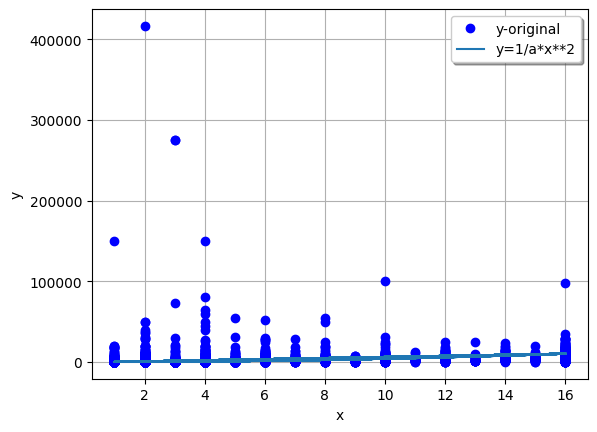

In [54]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [55]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.008938803216491875

al ser una r2 negativo y 0 no sirve para el analisis

funcion 2 con valor absoluto

In [56]:
def  func1 (x, a, b, c):
     return a*np.abs(x)+b*x+c

In [57]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x)+b*x+c
yfit1


,accommodates
0,1019.244520
1,1019.244520
2,5185.092158
3,1713.552460
4,1713.552460
...,...
26531,5879.400098
26532,1366.398490
26533,1366.398490
26534,1713.552460


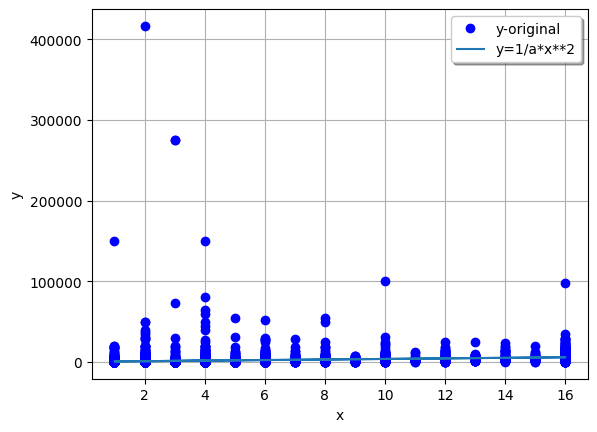

In [58]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [59]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.03406011523593311

funcion polinomial inversa 

In [60]:
def  func1 (x, a, b, c):
     return a/b*x**2+c*x

In [61]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['accommodates'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2+c*x
yfit1


,accommodates
0,832.580028
1,832.580028
2,5708.222202
3,1659.453486
4,1659.453486
...,...
26531,6500.856232
26532,1246.730078
26533,1246.730078
26534,1659.453486


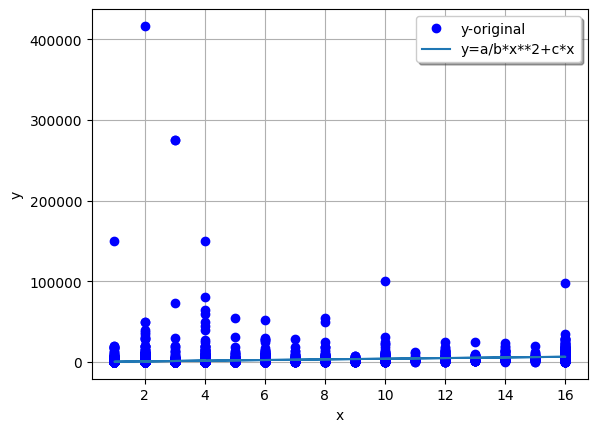

In [62]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a/b*x**2+c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [63]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.032276901057649354

al ser una r2 0 no sirve para el analisis

host_total_listings_count

In [64]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready['host_total_listings_count']
Var_Dep= mexicoready['price']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

modelo 1 funcion tangencial

In [65]:
def  func1 (x, a, b, c):
     return a*np.tan(x)+b

In [66]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x)+b
yfit1


C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\1342577043.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])
C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\1342577043.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])


0        1487.646192
1        1488.966198
2        1490.349114
3        1488.680842
4        1488.680842
            ...     
26531    1487.242719
26532    1488.498928
26533    1487.242719
26534    1487.752212
26535    1505.786896
Name: host_total_listings_count, Length: 26536, dtype: float64

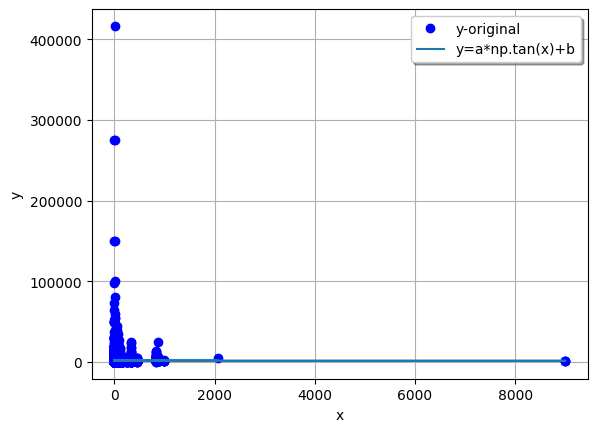

In [67]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*np.tan(x)+b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [68]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

2.32672143704038e-05

Función lineal con producto de coeficientes

In [69]:
def  func1 (x, a, b, c):
     return a*x + b*x + c*x

In [70]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_total_listings_count'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x
yfit1


0         17.859857
1          2.976643
2         50.602927
3         11.906571
4         11.906571
            ...    
26531     44.649642
26532    151.808781
26533     44.649642
26534      8.929928
26535    762.020548
Name: host_total_listings_count, Length: 26536, dtype: float64

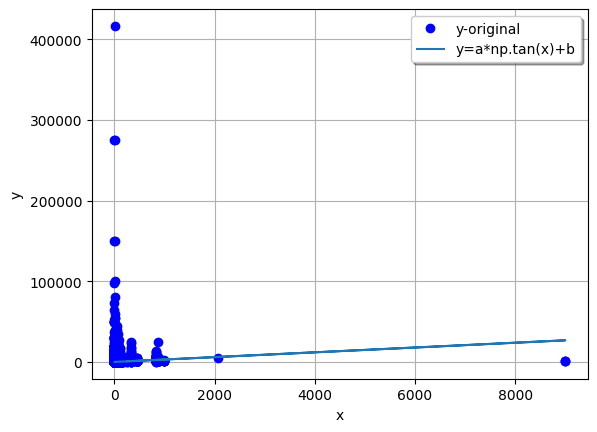

In [71]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*np.tan(x)+b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [72]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.10261256356895432

al ser negativo esta funcion no serviria para analisis

host_response_rate

In [73]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready['host_response_rate']
Var_Dep= mexicoready['price']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

Función cociente entre polinomios

In [74]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [75]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x
yfit1


0        1459.539212
1           0.000000
2        1459.539212
3        1459.539212
4        1656.127867
            ...     
26531    1459.539212
26532    1526.402863
26533    1459.539212
26534    1459.539212
26535    1459.539212
Name: host_response_rate, Length: 26536, dtype: float64

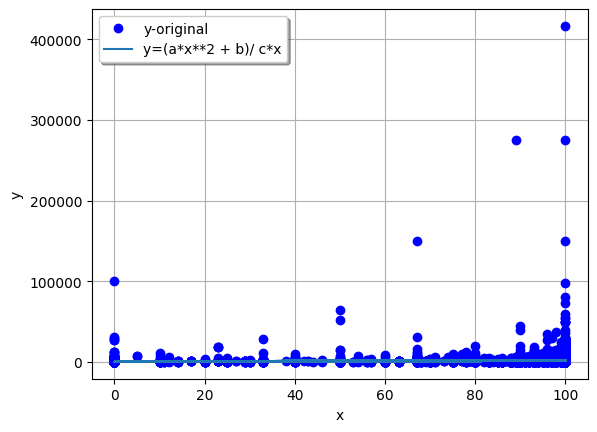

In [76]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=(a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [77]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.0034214129259528825

al ser una r2 negativa no funciona para el analisis

Función inversa

In [78]:
def  func1 (x, a, b, c):
     return 1/a*x 

In [79]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x
yfit1


C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\3956707532.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])
C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\3956707532.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['host_response_rate'], mexicoready['price'])


0        1511.278041
1           0.000000
2        1511.278041
3        1511.278041
4        1345.037456
            ...     
26531    1511.278041
26532    1465.939700
26533    1511.278041
26534    1511.278041
26535    1511.278041
Name: host_response_rate, Length: 26536, dtype: float64

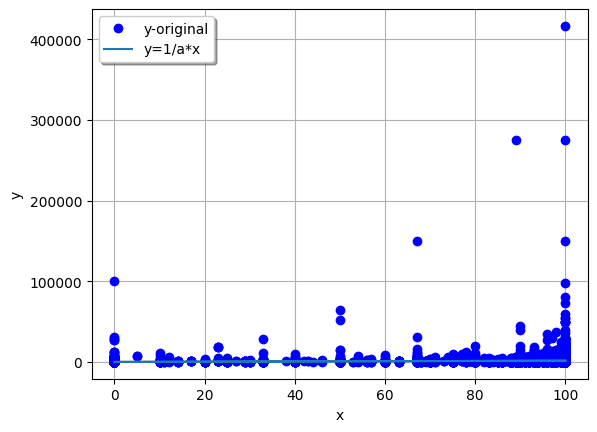

In [80]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [81]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.0048631448223883655

host_acceptance_rate

In [82]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready['host_acceptance_rate']
Var_Dep= mexicoready['price']
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

funcion cociente entre polinomios

In [83]:
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

In [84]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x
yfit1


0        1569.564503
1        1557.067089
2        1557.067089
3        1533.390840
4        1411.880495
            ...     
26531    1498.049722
26532    1561.220472
26533    1498.049722
26534    1498.049722
26535    1570.999121
Name: host_acceptance_rate, Length: 26536, dtype: float64

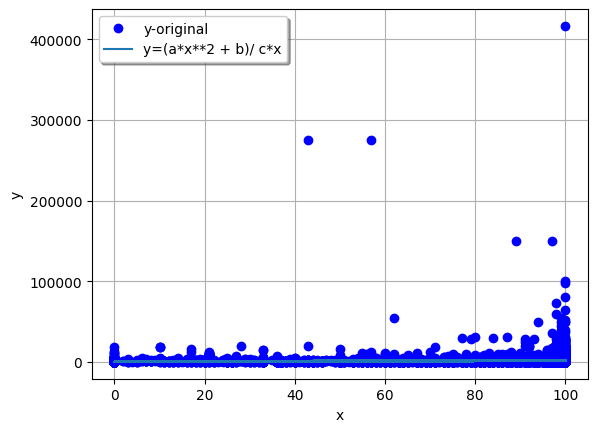

In [85]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=(a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [86]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.0036833906214379653

al ser negativa no funciona para el analisis

funcion 2  (Función cuadrática inversa)

In [87]:
def  func1 (x, a, b, c):
     return 1/a*x**2

In [88]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])
parametros
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2
yfit1


C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\3846678996.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])
C:\Users\Miroslava\AppData\Local\Temp\ipykernel_4192\3846678996.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, mexicoready['host_acceptance_rate'], mexicoready['price'])


0        1233.832402
1        1348.548224
2        1348.548224
3        1468.362528
4         612.455030
            ...     
26531    1593.275312
26532    1319.391286
26533    1593.275312
26534    1593.275312
26535    1205.950084
Name: host_acceptance_rate, Length: 26536, dtype: float64

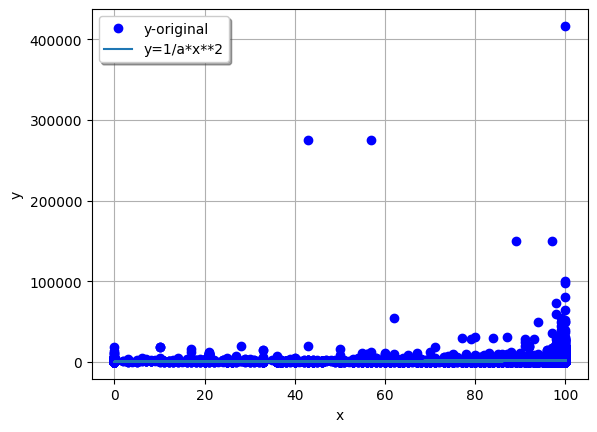

In [89]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [90]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.007479337912716488

al ser negativa no funciona para el analisis

In [91]:
mexicoready.head(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100.0,88.0,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,19.42063,-99.16586,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,3,48,3,3,48,48,3.0,48.0,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,f,3,2,1,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0.0,92.0,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,Condesa,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,1,7,1,1,7,7,1.0,7.0,t,28,58,88,363,2024-06-27,0,0,0,2011-11-09,2023-03-26,4.58,4.56,4.7,4.87,4.78,4.98,4.48,f,1,1,0,0.42
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"It borders the old and traditional San Rafael,...",https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100.0,92.0,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,1,365,1,1,365,365,1.0,365.0,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.7,4.87,4.78,4.98,4.48,f,13,4,2,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06-28,city scrape,15 blocks from Paseo de la Refo

***Modelo 1 Regresión No Lineal: Tasa de respuesta del anfitrión vs Tasa de aceptación del anfitrión***

In [92]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= mexicoready[['price']]
Var_Dep= mexicoready['reviews_per_month']

In [93]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [94]:
# Función exponencial
def func1(x, a, b, c):
    return a*x**2 + b*x + c # Función cuadrática

In [95]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, mexicoready['price'], mexicoready['reviews_per_month'])

In [96]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 4.99735382e-11, -2.22389865e-05,  1.73744822e+00])

In [97]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, mexicoready['price'], mexicoready['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c # Función cuadrática

In [98]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,price
0,1.700846
1,1.656657
2,1.353338
3,1.719379
4,1.694867
...,...
26531,1.565952
26532,1.704688
26533,1.716676
26534,1.720398


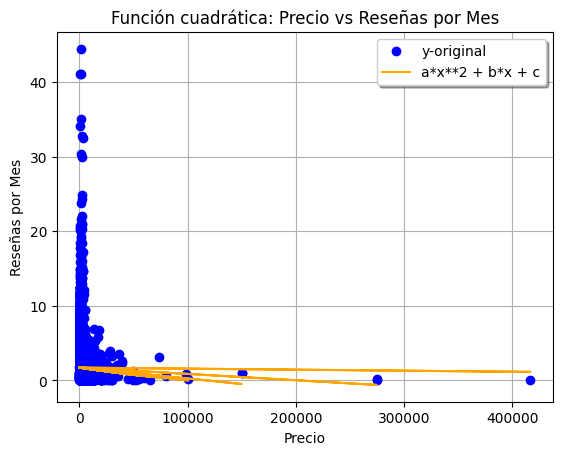

In [99]:
# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función cuadrática: Precio vs Reseñas por Mes')
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c", color='orange')
plt.xlabel('Precio')
plt.ylabel('Reseñas por Mes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [100]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.0008513401640594109

***Modelo 1  Función Polinomial Inversa: Capacidad de Alojamiento vs Precio del Anfitrión***

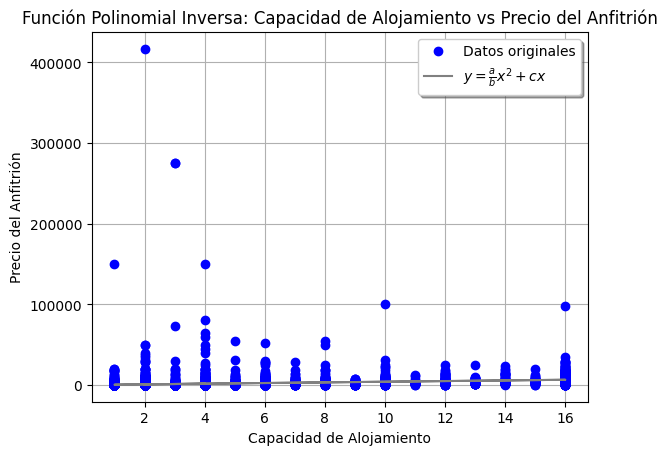

Coeficiente de determinación R²: 0.032276901057649354


In [105]:
# Declaramos las variables dependientes e independientes para la regresión No lineal 
Vars_Indep = mexicoready[['accommodates']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['price'].values  # Convertir a array unidimensional

# Definimos la función polinomial inversa
def func1(x, a, b, c):
    return (a / b) * x**2 + c * x  # Función polinomial inversa

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función Polinomial Inversa: Capacidad de Alojamiento vs Precio del Anfitrión')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="Datos originales")
plt.plot(Vars_Indep, yfit1, label="$y = \\frac{a}{b}x^2 + cx$", color='grey')
plt.xlabel('Capacidad de Alojamiento')
plt.ylabel('Precio del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

***Modelo 1  Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión***

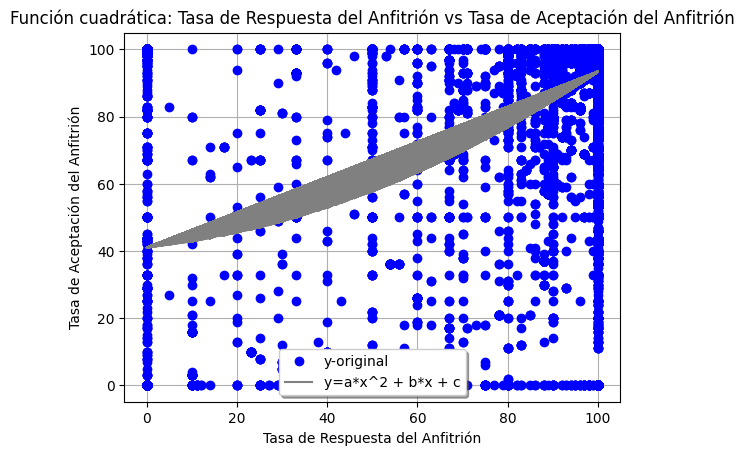

Coeficiente de determinación R²: 0.21041627230117266


In [106]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = mexicoready[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['host_acceptance_rate'].values  # Convertir a array unidimensional

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a * x**2 + b * x + c  # Función cuadrática

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=a*x^2 + b*x + c", color='grey')
plt.xlabel('Tasa de Respuesta del Anfitrión')
plt.ylabel('Tasa de Aceptación del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)


***Modelo 1  Funsion de valor absoluto: Tasa de Respuesta vs Opiniones de los Anfitriones por Mes***

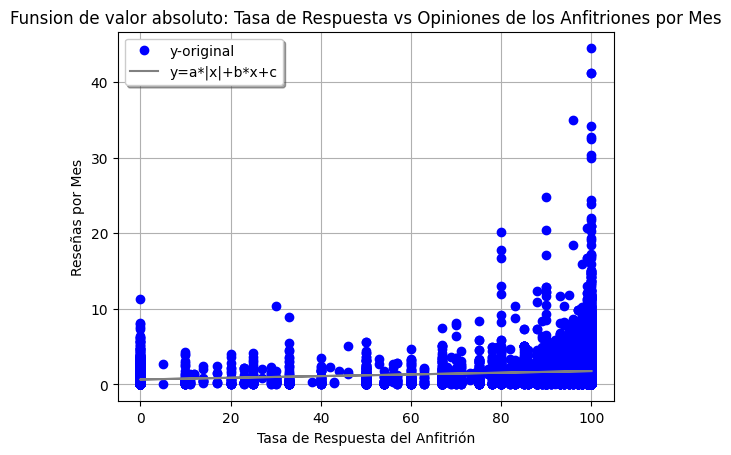

Coeficiente de determinación R²: 0.011869292978742618


In [107]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = mexicoready[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['reviews_per_month'].values  # Convertir a array unidimensional

# Definimos la función de valor absoluto
def func1(x, a, b, c):
    return a * np.abs(x) + b * x + c  # Función de valor absoluto

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Funsion de valor absoluto: Tasa de Respuesta vs Opiniones de los Anfitriones por Mes')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=a*|x|+b*x+c", color='grey')
plt.xlabel('Tasa de Respuesta del Anfitrión')
plt.ylabel('Reseñas por Mes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

***Modelo 1 Regresión Polinomial Inversa: Tasa de Respuesta del Anfitrión vs Listados Totales***

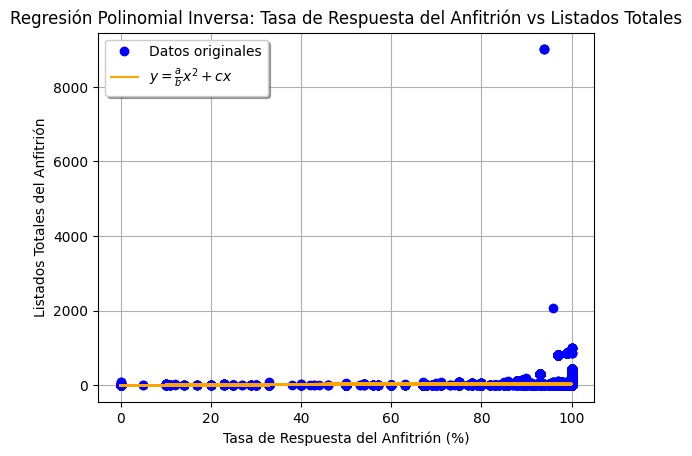

Coeficiente de determinación R²: 0.002437280830837385


In [94]:
# Declaramos las variables dependientes e independientes para la regresión
Vars_Indep = mexicoready[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['host_total_listings_count'].values  # Convertir a array unidimensional

# Definimos la función polinomial inversa
def func1(x, a, b, c):
    return (a / b) * x**2 + c * x  # Función polinomial inversa

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión
a, b, c = parametros

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Regresión Polinomial Inversa: Tasa de Respuesta del Anfitrión vs Listados Totales')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="Datos originales")
plt.plot(Vars_Indep, yfit1, label="$y = \\frac{a}{b}x^2 + cx$", color='orange')
plt.xlabel('Tasa de Respuesta del Anfitrión (%)')
plt.ylabel('Listados Totales del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

In [ ]:
***Modelo 1 Función Valor absoluto: Capacidad vs Total de anuncios de anfitriones***

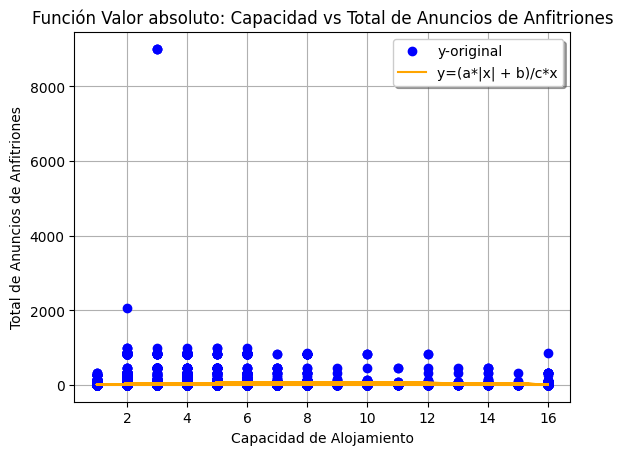

Coeficiente de determinación R²: 0.0020140540090247683


In [112]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = mexicoready[['accommodates']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['host_total_listings_count'].values  # Convertir a array unidimensional

# Definimos la función que incluye el valor absoluto
def func1(x, a, b, c):
    return (a * np.abs(x) + b) / c * x  # Función Valor absoluto

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función Valor absoluto: Capacidad vs Total de Anuncios de Anfitriones')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=(a*|x| + b)/c*x", color='orange')
plt.xlabel('Capacidad de Alojamiento')
plt.ylabel('Total de Anuncios de Anfitriones')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)

In [113]:
***Modelo 1 Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión***

SyntaxError: invalid syntax (4247551372.py, line 1)

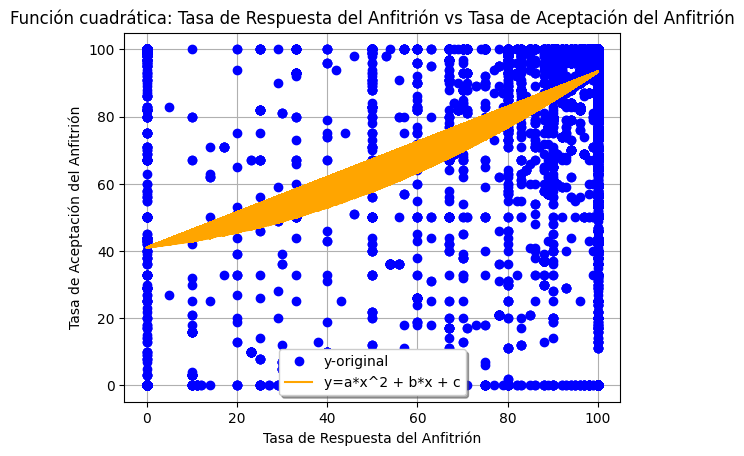

Coeficiente de determinación R²: 0.21041627230117266


In [95]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = mexicoready[['host_response_rate']].values.flatten()  # Convertir a array unidimensional
Var_Dep = mexicoready['host_acceptance_rate'].values  # Convertir a array unidimensional

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a * x**2 + b * x + c  # Función cuadrática

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
a, b, c = parametros[0], parametros[1], parametros[2]

# Creamos el modelo de predicción con los parámetros obtenidos
yfit1 = func1(Vars_Indep, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.title('Función cuadrática: Tasa de Respuesta del Anfitrión vs Tasa de Aceptación del Anfitrión')
plt.plot(Vars_Indep, Var_Dep, 'bo', label="y-original")
plt.plot(Vars_Indep, yfit1, label="y=a*x^2 + b*x + c", color='orange')
plt.xlabel('Tasa de Respuesta del Anfitrión')
plt.ylabel('Tasa de Aceptación del Anfitrión')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Calculamos el coeficiente de determinación del modelo
R2 = r2_score(Var_Dep, yfit1)
print("Coeficiente de determinación R²:", R2)


In [115]:
#Importar librerias necesarias
from funpymodeling.exploratory import freq_tbl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

*REGRESION LOGISTICA*

**Creación de Categorias a partir de clases**

***host_total_listings_count***

In [114]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=mexicoready['host_total_listings_count'].max()
Min=mexicoready['host_total_listings_count'].min()
Limites= [Min, Max]
Limites

[1, 9003]

In [115]:
mexicoready["host_total_listings_count"].unique()

array([   6,    1,   17,    4,    7,    3,    2,    8,    5,   30,   14,
         69,   11,   10,   12,   26,   47,   16,   15,   65,   21,    9,
         13,   34,   23,   20,   62,   35,   22,   52,   59,   54,   44,
         97,   82,   19,   18,  827,   89,   27,   33,   41,   40,   29,
         31,   39,   74,   25,   55,   57,   53,   46,   50,   24,   37,
         38,   45,   48,  210,   36,   80,  103,  189,  104,   49,  118,
        113,  120,   32,  442,  122,   88,   78,  154,   63,   28,   75,
        233,  178,   95,   42,   85,  107,  256,  102, 2072,  228,   92,
         56,  198,  190,  869,   91,   68,   43,   83,  138,   93,  153,
         51,  115,  151,   71,   86,  332,  323,   98, 9003,   61,  863,
        264,  306,  109,   77,   66,   58,  998,  166], dtype=int64)

In [108]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(-1, 246, 3)
intervalos

array([ -1. , 122.5, 246. ])

In [109]:
#Creamos las categorías 
categorias= ["Alto", "Bajo"]

In [110]:
host_total_listings_count_numeric=mexicoready['host_total_listings_count']
mexicoready.insert(0,"host_total_listings_count_numeric", host_total_listings_count_numeric)

In [111]:
#Finalmente creamos las categorías en la columna numérica
mexicoready['host_total_listings_count']=pd.cut(x= mexicoready['host_total_listings_count'], bins=intervalos, labels= categorias )

In [112]:
mexicoready['host_total_listings_count'].head()

0    Alto
1    Alto
2    Alto
3    Alto
4    Alto
Name: host_total_listings_count, dtype: category
Categories (2, object): ['Alto' < 'Bajo']

In [113]:
# Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = mexicoready[['accommodates']]
Var_Dep = mexicoready['host_total_listings_count']
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [116]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [117]:
#Se escalan todos los datos
escalar = StandardScaler()

In [118]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [119]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()